# Depth First Search

DFS is an algorithm that traverses through a graph. It has many applications and can be adapted to suit a variety of path-finding algorithms. It has both a recursive and an iterative solution. The idea behind DFS is to explore along the longest path as possible until it's no longer possible and then back-tracking until a new path can be explored.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks, animate_graph

gifs_path = 'bfs-dfs-gifs'

# Recursive solution

Between the recursive and iterative solutions, the recursive one is much more natural. Here's the pseudo-code.

```python
function DFS(Graph, node):
    mark node
    for neighbor in node.neighbors:
        mark edge(node, neighbor)
        DFS(Graph, neighbor)
```

We start at a random node and just start tracing a path. When we can't continue to a new node we backtrack along our path until we can branch off again. This process repeats recursively.

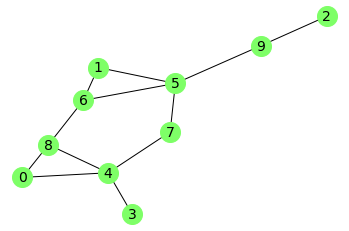

In [2]:
G = nx.erdos_renyi_graph(10, 0.3)
draw_graph(G)

In [3]:
def DFS_recursive(G, node):
    def _DFS_recursive(G, node, tree_edges):
        G.nodes[node]['marked'] = True
    
        for neighbor in G.adj[node]:
            if not G.nodes[neighbor].get('marked'):
                print(f'marking edge: ({node}, {neighbor})')
                tree_edges.append((node, neighbor))
                G.edges[node, neighbor]['marked'] = True
            
                _DFS_recursive(G, neighbor, tree_edges)
    
    tree_edges = []
    _DFS_recursive(G, node, tree_edges)
    return tree_edges

In [4]:
clear_marks(G)
tree_edges = DFS_recursive(G, 0)
tree_edges

marking edge: (0, 4)
marking edge: (4, 3)
marking edge: (4, 7)
marking edge: (7, 5)
marking edge: (5, 1)
marking edge: (1, 6)
marking edge: (6, 8)
marking edge: (5, 9)
marking edge: (9, 2)


[(0, 4), (4, 3), (4, 7), (7, 5), (5, 1), (1, 6), (6, 8), (5, 9), (9, 2)]

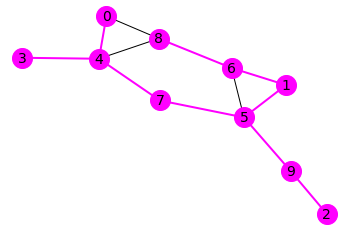

In [5]:
draw_graph(G)

In [6]:
animate_graph(G, tree_edges, f'{gifs_path}/dfs-recursive-undirected.gif')

<Figure size 432x288 with 0 Axes>

We see that when the original graph is connected, the algorithm outputs a spanning tree.

Lastly we'll compare between the original graph and the spanning tree.

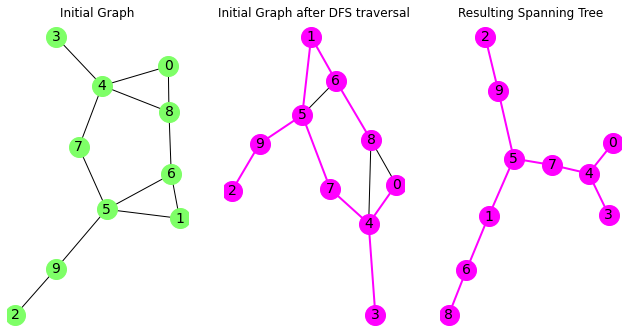

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(11,5.625))

axes[0].set_title('Initial Graph')
draw_graph(G, with_tree=False, ax=axes[0])

axes[1].set_title('Initial Graph after DFS traversal')
draw_graph(G, ax=axes[1])

G_copy = G.copy()
for edge in G_copy.edges:
    if not G_copy.edges[edge].get('marked'):
        G_copy.remove_edge(*edge)
axes[2].set_title('Resulting Spanning Tree')
draw_graph(G_copy, ax=axes[2])

# Iterative solution

The iterative solution is slightly more complicated but only because we need to keep track of the edges we visited using a stack.

```python
function DFS(Graph, node):
    init stack
    stack.push(node)
    while stack isnt empty:
        node = stack.pop()
        if node wasnt previously visited:
            mark(node) as visited
            mark the edge to node as visted
        
        for neighbor in node.adj:
            if the neighbor wasnt visited:
                mark(neighbor) as visited
                stack.push(neighbor)
```

In th implementation our stack keeps track of the edges for the output as a tree.

In [8]:
def DFS_iterative(graph, node):
    tree_edges = []
    stack = [(None, node)]
    while stack:        
        prev_node, node = stack.pop()
        
        if not graph.nodes[node].get('marked'):
            graph.nodes[node]['marked'] = True
            if prev_node is not None:
                print(f'marking edge: ({prev_node}, {node})')
                tree_edges.append((prev_node, node))
                graph.edges[prev_node, node]['marked'] = True
                
            prev_node = node
            for neighbor in graph.adj[node]:
                if not graph.nodes[neighbor].get('marked'):
                    stack.append((prev_node, neighbor))
    return tree_edges

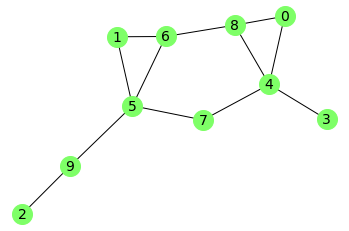

In [9]:
# We unmark all the nodes so we can 
# run the iterative algorithm.
clear_marks(G)
draw_graph(G)

In [10]:
tree_edges = DFS_iterative(G, 0)
tree_edges

marking edge: (0, 8)
marking edge: (8, 6)
marking edge: (6, 5)
marking edge: (5, 9)
marking edge: (9, 2)
marking edge: (5, 7)
marking edge: (7, 4)
marking edge: (4, 3)
marking edge: (5, 1)


[(0, 8), (8, 6), (6, 5), (5, 9), (9, 2), (5, 7), (7, 4), (4, 3), (5, 1)]

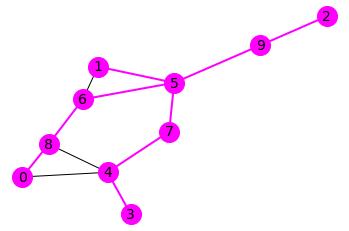

In [11]:
draw_graph(G)

In [12]:
animate_graph(G, tree_edges, f'{gifs_path}/dfs-iterative-undirected.gif')

<Figure size 432x288 with 0 Axes>

Again we'll compare between the original graph and the spanning tree.

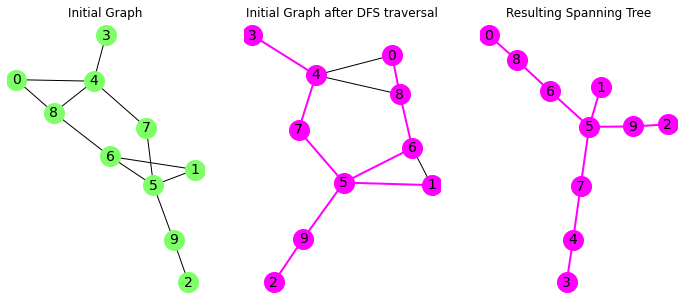

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(12,5))

axes[0].set_title('Initial Graph')
draw_graph(G, with_tree=False, ax=axes[0])

axes[1].set_title('Initial Graph after DFS traversal')
draw_graph(G, ax=axes[1])

G_copy = G.copy()
for edge in G_copy.edges:
    if not G_copy.edges[edge].get('marked'):
        G_copy.remove_edge(*edge)
axes[2].set_title('Resulting Spanning Tree')
draw_graph(G_copy, ax=axes[2])